In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Advanced Visualization
import plotly.express as px
import plotly.graph_objects as go 

# Interactive Notebooks
%matplotlib inline
from IPython.display import display 

# Geospatial map
import folium

In [2]:
# Making a copy of the cleaned data
cleaned_data = pd.read_csv('../Data/Processed/cleaned_sales_data.csv')

In [3]:
data_copy = cleaned_data.copy()

# EDA and Answering some questions

In [4]:
data_copy.head()

Order ID        Date                        Status Fulfilment  \
0  405-8078784-5731545  2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146  2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951  2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320  2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  western dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            top   

  Size  ...   ship-state ship-postal-code  ship-country    B2B  Month Day  \
0    S  ...  MAHARASHTRA         400081.0            IN  False      4  30   
1  3XL  ...    KARNATAKA         560085.0            IN  False      4  30   
2   XL  ...  MAHARASHTRA         410210.0            IN   True      4  30   
3    L  ...   PUDUCHERRY         605008.0            IN  False      4  30   
4  3XL  ...   TAMIL NADU         600073.0            IN  False      4  30   

   Year  day_of_week Total_Sales  Is_Weekend  
0  2022            5         0.0           1  
1  2022            5       406.0           1  
2  2022            5       329.0           1  
3  2022            5         0.0           1  
4  2022            5       574.0           1  

[5 rows x 26 columns]

In [5]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

In [6]:
data_copy.shape

(128975, 26)

In [7]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      128975 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            128975 non-null  object 
 14  Amount              128975 non-null  float64
 15  ship-city           128942 non-nul

In [8]:
data_copy.describe().T

count           mean            std       min       25%  \
Qty               128975.0       0.904431       0.313354       0.0       1.0   
Amount            128975.0     648.561465     272.581240       0.0     459.0   
ship-postal-code  128942.0  463966.236509  191476.764941  110001.0  382421.0   
Month             128975.0       4.909192       0.818402       3.0       4.0   
Day               128975.0      14.925978       8.742876       1.0       7.0   
Year              128975.0    2022.000000       0.000000    2022.0    2022.0   
day_of_week       128975.0       3.012088       2.026397       0.0       1.0   
Total_Sales       128975.0     590.368023     388.161590       0.0     399.0   
Is_Weekend        128975.0       0.295739       0.456376       0.0       0.0   

                       50%       75%       max  
Qty                    1.0       1.0      15.0  
Amount               635.0     771.0    5584.0  
ship-postal-code  500033.0  600024.0  989898.0  
Month                  5.0       6.0       6.0  
Day                   15.0      22.0      31.0  
Year                2022.0    2022.0    2022.0  
day_of_week            3.0       5.0       6.0  
Total_Sales          568.0     771.0   44672.0  
Is_Weekend             0.0       1.0       1.0

## <mark>Sales Analysis</mark>

#### 1. What is the total revenue generated over the given time frame?

In [9]:
total_revenue = data_copy['Amount'].sum()
print(f'Total Revenue generated over the given time frame is: INR {total_revenue:.3f}')

Total Revenue generated over the given time frame is: INR 83648214.918


In [10]:
cleaned_data['Amount'].describe()

count    128975.000000
mean        648.561465
std         272.581240
min           0.000000
25%         459.000000
50%         635.000000
75%         771.000000
max        5584.000000
Name: Amount, dtype: float64

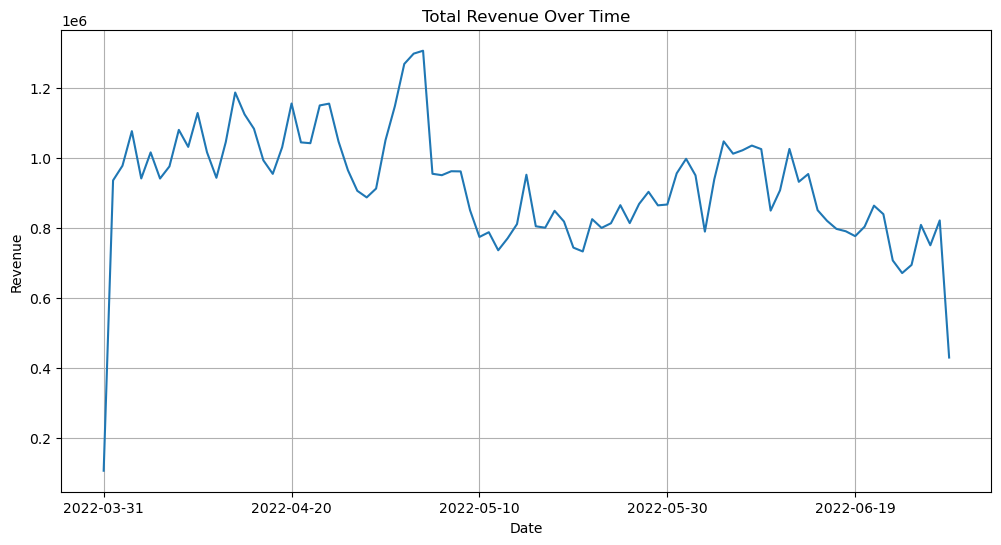

In [11]:
daily_revenue = data_copy.groupby('Date')['Amount'].sum()

plt.figure(figsize=(12, 6))
daily_revenue.plot()
plt.title('Total Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

### 2. How do sales trends look over time?

In [12]:
total_sales_over_time = data_copy.groupby('Date')['Total_Sales'].sum().reset_index()

# Creating the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=total_sales_over_time['Date'], 
                         y=total_sales_over_time['Total_Sales'],
                         mode='lines+markers',
                         name='Total Sales Over Time',
                         line=dict(color='maroon')))

fig.update_layout(title='Total Sales Over Time',
                  xaxis_title='Date',
                  yaxis_title='Total Sales')

fig.show()

### 3. Which are the top 10 products in terms of sales and quantity?

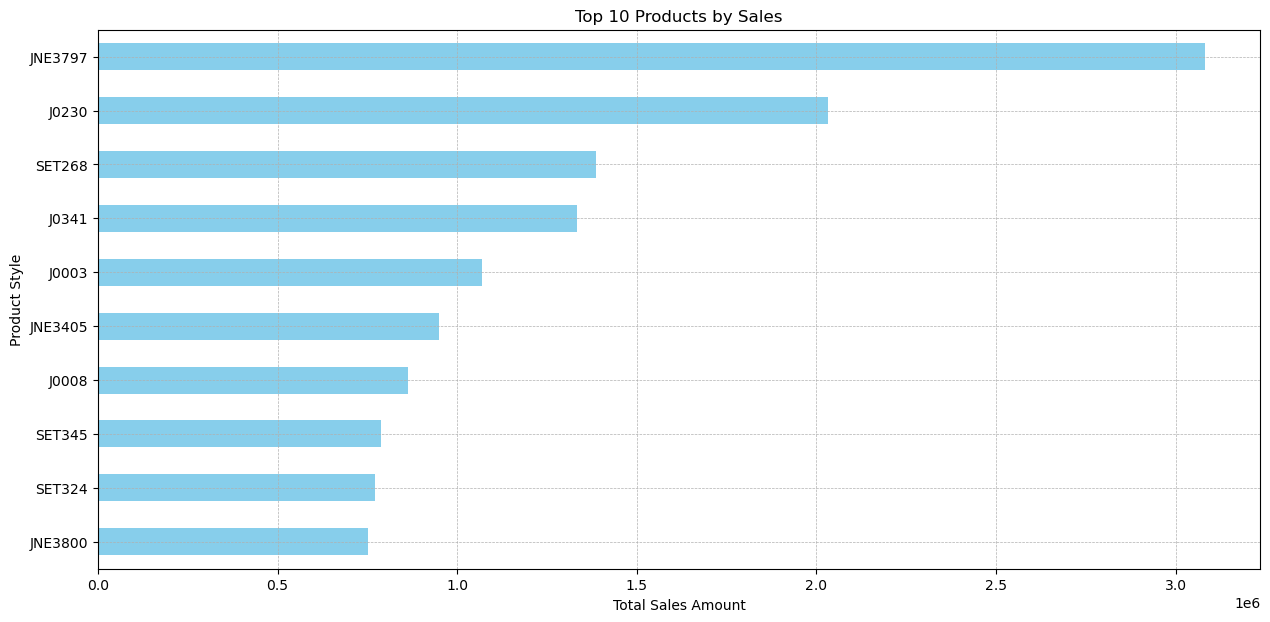

In [13]:
top_10_sales = cleaned_data.groupby('Style')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 7))
top_10_sales.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Product Style')
plt.xlabel('Total Sales Amount')
plt.gca().invert_yaxis()  # This is to have the product with highest sales on top
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


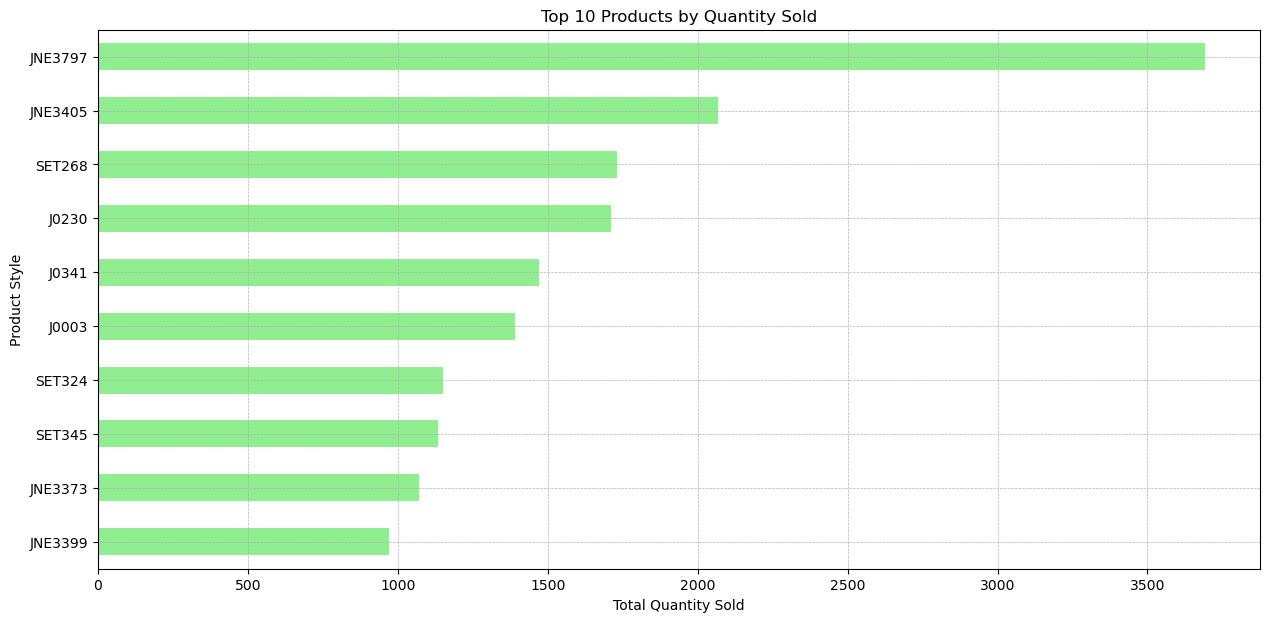

In [14]:
top_10_qty = data_copy.groupby('Style')['Qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 7))
top_10_qty.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Product Style')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()  # This is to have the product with highest quantity on top
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In the above two visualisations we've plotted product style by quantity of products sold and quantity respectively. Insights from both the bar graphs produce more or less the same information as the product JNE3797 has the highest frequency across both total quantity sold and total sales amount followed by JNE3405 grossing 2nd highest in both graphs and JNE3399 with the lowest number of occurences.

## <mark>Product Analysis</mark>

### 1. Which categories are the most popular?

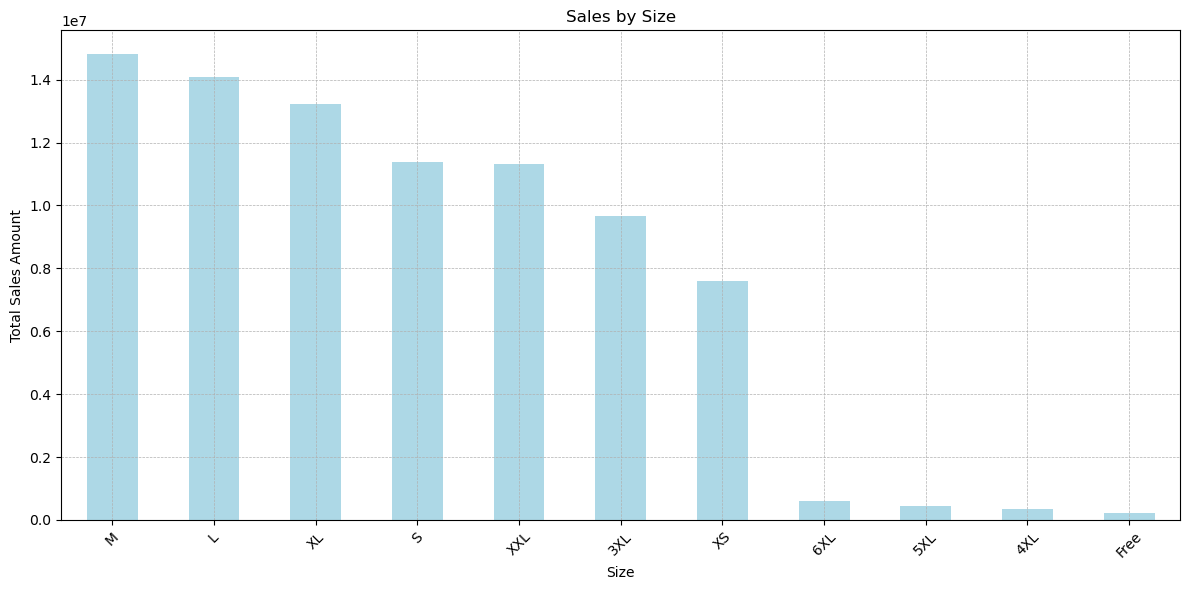

In [15]:
sales_by_size = data_copy.groupby('Size')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_size.plot(kind='bar', color='lightblue')
plt.title('Sales by Size')
plt.ylabel('Total Sales Amount')
plt.xlabel('Size')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The above bar graph shows the distribution of product size with respect to the total sales amount. By looking at this graph we learn that product size of 'M' is the most desirable size amoungts our customer base, hence, most of our customers prefer wearing clothes of 'Medium' fit. Product size of 'free' has the lowest preference amongst our customer base, therefore, our products do not appeal to customer who prefer 'free' sized clothes. Hence, the company should focus on making products whose 'size' ranges from 'S' to '6XL' were the first being the smallest available size and the last being the largest available fit.

### 2. What is the average sales amount for each category?

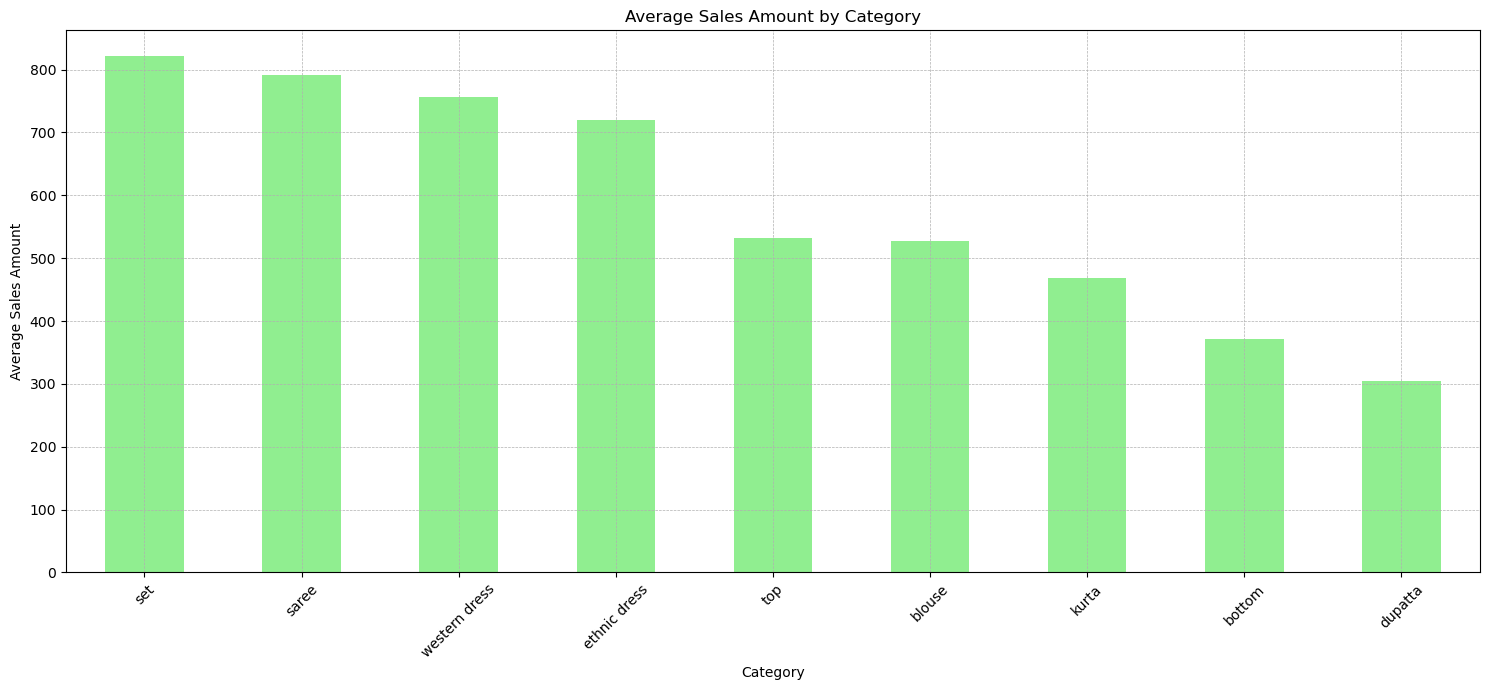

In [16]:
# Grouping by Category and computing the average sales amount
average_sales_per_category = data_copy.groupby('Category')['Amount'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(15, 7))
average_sales_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Sales Amount by Category')
plt.ylabel('Average Sales Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The above bar graph represents the plot of category with respect to the average sales amount. 'Set' is the most popular product, it makes the maximum contribution to the company's Average Sales Amount. 'Set' produces more than 800k INR worth of sales and on the other hand 'Dupatta' is the least popular product sold by the company. The company should implement marketing statergies to maximize 'dupatta' sales and retain 'Set' sales so that they remain uniform in the future.

## <mark>Customer Analysis</mark>

### 1. How many unique customers are there?

In [17]:
n_unique_customers = data_copy['Order ID'].nunique()

(0.0, 1.0, 0.0, 1.0)

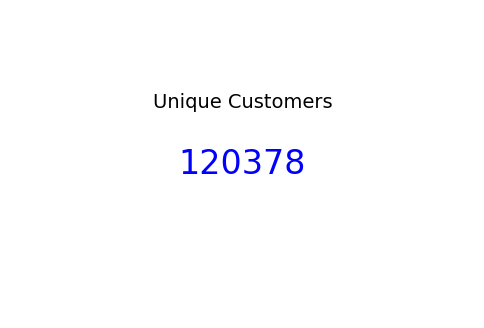

In [18]:
fig, ax = plt.subplots(figsize=(6,4))

# Display the number
ax.text(0.5, 0.5, str(n_unique_customers), ha='center', va='center', fontsize=24, color='blue')
ax.text(0.5, 0.7, 'Unique Customers', ha='center', va='center', fontsize=14, color='black')

# Remove axis
ax.axis('off')


In [19]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

### 2. What's the distribution of orders per customer

In [20]:
orders_per_city = data_copy.groupby('ship-state')['Order ID'].count().reset_index()
orders_per_city = orders_per_city.sort_values(by='Order ID', ascending=False).head(20)

In [21]:
fig = px.bar(orders_per_city, x='ship-state', y='Order ID', 
             title='Top 20 States by Number of Orders',
             labels={'Order ID': 'Number of Orders', 'ship-city': 'City'},
             color='Order ID', color_continuous_scale='icefire')
fig.show()

The above bar graph shows the distribution of top 20 states with the highest number of orders. The state of Maharastra comprises of the largest part of our customer base as it has the highest number of order than any other state. On the other hand the company's customer base in states like Assam, Uttarakhand, Jharkhand and Goa is weak. The company needs to take major step to increase the demand of their products the those states which have less customers. This can be done by making culturally relevant products that are suited to people's taste although style can be very subjective and can vary from people to people.

### 3. Which days of the week have the highest sales?

In [22]:
sales_per_day = data_copy.groupby('day_of_week')['Total_Sales'].sum().reset_index()

In [23]:
fig = px.pie(sales_per_day, values='Total_Sales', names='day_of_week', title='Sales Distribution Across Days of the Week')
fig.show()

The above pie chart shows us that most of our customers tend to buy our products. From this visualization we can draw some customer behaviour insights which can give us some critical information such as the highest % of purchases (15.3%) happen on Sunday (day 6). This means that a large chuck of our customer's prefer shopping on Sunday. Similarly, the lowest % of purchases (13.7%) happen on Thursday (day 4). Distribution of sales through out the week is fairly similar and there isn't much variation.

### 4. Which month or time of the year register the highest sales?

In [24]:
month_sales = data_copy.groupby('Month')['Total_Sales'].sum().reset_index()

fig = px.line(month_sales, x='Month', y='Total_Sales', title='Monthly Sales Distribution', markers=True)
fig.show()

The above line graph tells us that a big part of our total sales happen in between mid-march and may. Sales slowed decline after may reaching the it's lowest point in the month of may.

## <mark>Geographical Analysis</mark>


### 1. Which ship-state or ship-city generates the most sales?

In [25]:
city_sales = data_copy.groupby('ship-city')['Total_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(city_sales, x='ship-city', y='Total_Sales', title='Top 10 Cities by Sales')
fig.show()

The above bar graph shows Bengaluru has the highest amount of total sales followed by Hyderabad, then Mumbai and the Chennai. This could mean that customers buying products from Bengaluru might have higher income as compared to the customers buying products from other cities. Another speculation can be made that, the products that the is selling are found more desirable and appealing to the customers from Benagluru.

### 2. States or Cities with high sales but fewer orders

In [26]:
grouped = data_copy.groupby('ship-state').agg({'Total_Sales':'sum', 'Order ID':'count'}).reset_index()
grouped.rename(columns={'Total_Sales':'Total_Sales', 'Order ID':'Total_Orders'}, inplace=True)

In [27]:
grouped['Avg_Order_Value'] = grouped['Total_Sales'] / grouped['Total_Orders']

# Sort by Average Order Value to identify states with high average sales but fewer orders
top_states = grouped.sort_values(by='Avg_Order_Value', ascending=False)

In [28]:
fig = px.scatter(top_states, 
                 x='Total_Orders', 
                 y='Total_Sales', 
                 size='Avg_Order_Value', 
                 hover_name='ship-state', 
                 title='Bubble Chart of Sales, Orders, and Average Order Value by State',
                 size_max=50)

# Display the figure
fig.show()

The following bubble chart provides a visual representation of the sales and orders data for different states, with an emphasis on the average order value. States located further to the right have a higher number of orders, while states higher on the chart have greater total sales. A larger bubble indicates that, on average, orders from that state have a higher sales value. This can be a sign of either higher-priced products being preferred or larger quantities being ordered.

## <mark>Shipping Analysis</mark>

### 1. What are the most common shipping levels

In [29]:
shipping_counts = data_copy['ship-service-level'].value_counts().reset_index()
shipping_counts.columns = ['Shipping Level', 'Count']

In [30]:
shipping_counts

Shipping Level  Count
0      Expedited  88615
1       Standard  40360

In [31]:
fig = px.bar(shipping_counts, x='Shipping Level', y='Count', title='Most Common Shipping Levels')
fig.show()

The following bar graph provides the visual representation of shipping level and count. The graph clearly indicates that a large chunk of customers have opted for Expedited level of shipping service while the rest have opted for standard. Hence more than 80k customers receive faster deliveries as compated to 40k customers.

### 2. Does the shipping service level influence sales? (Do premium shipping services result in more sales?)

In [32]:
shipping_sales = data_copy.groupby('ship-service-level')['Amount'].sum().reset_index()

fig = px.bar(shipping_sales, x='ship-service-level', y='Amount', title='Total Sales by Shipping Service Level')
fig.show()

The following bar graph provides the visual representation of shipping level and Amount. This shows us that ship service level that is expedited has more count on the scale of amount as compared to standard. Customers with expedited service level contrtibute to higher chunk of the total amount (More than 50M).

### 3. How does the Courier Status relate to sales? (Which courier partners are bringing in the most revenue?)

In [33]:
courier_sales = data_copy.groupby('Courier Status')['Amount'].sum().reset_index()

fig = px.pie(courier_sales, names='Courier Status', values='Amount', title='Sales Distribution by Courier Status')
fig.show()

This pie chart help us visualise the distribution of courier status of the company products. Most of the products have been successfully shipped after the order was place (84.9%), (5.29%) of products were unshipped, (4.6%) of products were cancelled by the customers and (5.16%) of products seem to be unavailable.

## <mark>Payment Analysis</mark>

### 1. Does the B2B column indicate higher sales values compared to non-B2B transactions?

In [34]:
b2b_avg_sales = data_copy.groupby('B2B')['Amount'].mean().reset_index()

fig = px.bar(b2b_avg_sales, x='B2B', y='Amount', title='Average Sales for B2B vs. Non-B2B')
fig.show()

B2B transactions show a higher average sale as compared to Non-B2B transactions, indicating that when the company sells to other businesses, the order values tend to be larger. If B2B transactions show higher average sales, it underscores the potential value of maintaining strong relationships with business clients. Specialized marketing campaigns, loyalty programs, or bulk discounts might be effective strategies to boost B2B sales further. It might be beneficial to dig deeper and analyze the frequency of transactions, profitability, and other metrics to get a holistic view of the B2B vs. Non-B2B segments. This will aid in formulating more strategic business decisions.

## <mark>Category and Product Analysis</mark>

### 1. Which Style or Size is the most popular, and how does it relate to different product Categories?

In [35]:
size_popularity = data_copy.groupby('Size')['Qty'].sum().sort_values(ascending=False)

In [36]:
size_popularity

Size
M       20447
L       20000
XL      18923
XXL     16516
S       15331
3XL     13524
XS       9943
6XL       688
5XL       513
4XL       398
Free      366
Name: Qty, dtype: int64

In [37]:
fig = px.line(size_popularity, x=size_popularity.index, y=size_popularity.values, title='Popularity of Styles')
fig.show()


Styles that have an upward trend on the line graph indicate increasing popularity (M size). This could be due to various factors such as changing fashion trends, seasonal demand, or effective marketing campaigns. Styles with a flat line suggest consistent demand. These styles can be considered timeless or staples in the collection. Styles that show an increasing trend can have more inventory or increased production to meet the growing demand. Styles that are declining might need rejuvenated marketing efforts or promotional campaigns to boost their demand.

### 2. What is the relation of style and size with product categories

In [38]:
category_size = data_copy.groupby(['Category', 'Size'])['Qty'].sum().reset_index()
fig = px.bar(category_size, x='Category', y='Qty', color='Size', title='Size Popularity within Product Categories', barmode='group')
fig.show()

The code you've provided creates a grouped bar chart to showcase the popularity (based on quantity) of different sizes within various product categories. The Category is on the x-axis, the Qty (Quantity) is on the y-axis, and different sizes are distinguished by color. M size might be universally popular and cater to a broad segment of the market. Sizes 4XL, 5XL, 6XL, and free might require specific marketing attention or limited inventory stocking.

### 2. Which SKU or ASIN is returned most(if the status column indicates returned products)?

In [39]:
data_copy['Courier Status'].value_counts()

Courier Status
Shipped          109487
Not Available      6872
Unshipped          6681
Cancelled          5935
Name: count, dtype: int64

In [40]:
returned_products = data_copy[data_copy['Courier Status'] == 'Cancelled']
returned_products

Order ID        Date     Status Fulfilment Sales Channel   \
8       407-5443024-5233168  2022-04-30  Cancelled     Amazon      Amazon.in   
65      171-4137548-0481151  2022-04-30  Cancelled     Amazon      Amazon.in   
84      403-9950518-0349133  2022-04-30  Cancelled     Amazon      Amazon.in   
95      405-9112089-3379536  2022-04-30  Cancelled     Amazon      Amazon.in   
101     402-7841951-1872363  2022-04-30  Cancelled     Amazon      Amazon.in   
...                     ...         ...        ...        ...            ...   
128903  406-3923120-4345139  2022-05-31  Cancelled     Amazon      Amazon.in   
128907  403-6757403-6097100  2022-05-31  Cancelled     Amazon      Amazon.in   
128908  403-6757403-6097100  2022-05-31  Cancelled     Amazon      Amazon.in   
128958  408-9513596-4393945  2022-05-31  Cancelled     Amazon      Amazon.in   
128967  404-5182288-1653947  2022-05-31  Cancelled     Amazon      Amazon.in   

       ship-service-level    Style                  SKU Category Size  ...  \
8               Expedited   SET200  SET200-KR-NP-A-XXXL      set  3XL  ...   
65              Expedited  JNE3373       JNE3373-KR-XXL    kurta  XXL  ...   
84              Expedited  JNE3510         JNE3510-KR-M    kurta    M  ...   
95              Expedited  JNE3405         JNE3405-KR-L    kurta    L  ...   
101             Expedited   SET347       SET347-KR-NP-S      set    S  ...   
...                   ...      ...                  ...      ...  ...  ...   
128903          Expedited  JNE3801         JNE3801-KR-M    kurta    M  ...   
128907          Expedited    NW014     NW014-ST-SR-XXXL      set  3XL  ...   
128908          Expedited    NW007     NW007-ST-CP-XXXL      set  3XL  ...   
128958          Expedited   SET058       SET058-KR-NP-L      set    L  ...   
128967          Expedited  JNE3638        JNE3638-KR-XS    kurta   XS  ...   

            ship-state ship-postal-code  ship-country    B2B  Month Day  Year  \
8            TELANGANA         500008.0            IN  False      4  30  2022   
65             Gujarat         389151.0            IN  False      4  30  2022   
84           TELANGANA         500072.0            IN  False      4  30  2022   
95         MAHARASHTRA         411046.0            IN  False      4  30  2022   
101              DELHI         110036.0            IN  False      4  30  2022   
...                ...              ...           ...    ...    ...  ..   ...   
128903  ANDHRA PRADESH         515001.0            IN  False      5  31  2022   
128907   UTTAR PRADESH         201306.0            IN  False      5  31  2022   
128908   UTTAR PRADESH         201306.0            IN  False      5  31  2022   
128958       KARNATAKA         560037.0            IN  False      5  31  2022   
128967     WEST BENGAL         700040.0            IN  False      5  31  2022   

        day_of_week Total_Sales  Is_Weekend  
8                 5         0.0           1  
65                5         0.0           1  
84                5         0.0           1  
95                5         0.0           1  
101               5         0.0           1  
...             ...         ...         ...  
128903            1         0.0           0  
128907            1         0.0           0  
128908            1         0.0           0  
128958            1         0.0           0  
128967            1         0.0           0  

[5935 rows x 26 columns]

In [41]:
sku_returns = returned_products['SKU'].value_counts()

In [42]:
asin_returns = returned_products['ASIN'].value_counts()

In [43]:
fig_sku = px.bar(x=sku_returns.index[:10], y=sku_returns.values[:10], title='Top 10 Returned SKUs', labels={'x': 'SKU', 'y': 'Number of Returns'})
fig_sku.show()

The SKUs displayed on the chart represent products with the highest return rates, signaling potential issues with either the products themselves or customer expectations not being met. A high number of returns could indicate issues with the product quality, fit, or other attributes that don't meet customer expectations. This is especially pertinent for categories like apparel, where sizing and fit can lead to returns. Products may be returned if there's a significant difference between how they're represented online (or in marketing materials) and the actual product received by customers.

In [44]:
fig_asin = px.bar(x=asin_returns.index[:10], y=asin_returns.values[:10], title='Top 10 Returned ASINs', labels={'x': 'ASIN', 'y': 'Number of Returns'})
fig_asin.show()

The ASINs presented on the chart are the products with a notable return rate. This is indicative of potential discrepancies between customer expectations and the product's attributes or performance. High returns could stem from various reasons: misrepresentation of the product online, product defects, confusion about product usage, or mismatches in sizing (for products like apparel).
Monitoring these ASINs over time will help identify if they consistently top the return charts or if the high return rate is a one-time occurrence, possibly resulting from a faulty batch. A high return rate, especially for popular or premium items, can lead to significant financial repercussions due to refund processes, restocking, and the potential erosion of customer trust.

## <mark>Fulfillment and Sales Channel Analysis</mark>

### 1. Which Sales Channel has the highest sales or the highest number of orders?

In [45]:
sales_by_channel = data_copy.groupby('Sales Channel ')['Amount'].sum().sort_values(ascending=False)

In [46]:
orders_by_channel = data_copy['Sales Channel '].value_counts()

In [47]:
fig_sales = px.bar(x=sales_by_channel.index, y=sales_by_channel.values, title='Sales by Sales Channel', labels={'x': 'Sales Channel', 'y': 'Total Sales'})
fig_sales.show()

fig_orders = px.bar(x=orders_by_channel.index, y=orders_by_channel.values, title='Number of Orders by Sales Channel', labels={'x': 'Sales Channel', 'y': 'Number of Orders'})
fig_orders.show()

### 2. How does the Fulfillment method impact sales? (Do certain fulfillment methods lead to higher sales?)

In [48]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

In [49]:
fulfillment_impact = data_copy.groupby('Fulfilment')['Total_Sales'].value_counts().reset_index()

In [50]:
fig = px.pie(fulfillment_impact, values='Total_Sales', names='Fulfilment',  title='Fulfillment Impact based on Total Sales')
colors= ['gold', 'mediumturquoise']
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.show()

This pie chart helps us represent the impact of fulfillment method has on total sales of products. As we can see that orders fulfilled by Amazon results in significantly more sales as compared to the amount of sales generated by Merchant. This could mean that Amazon service is faster, leading to more customer satisfaction and repeated purchases. Using Amazon service could be cost-effective for customers, perhaps offering free or lower shipping cost. Merchant method seems underutilized but might offe potential advantages, there might be an opportunity to promote it more aggressively or optimize its operations. Conversely, if a method is heavily utilized, ensuring its smooth operation becomes crucial. Any disruption can have a direct impact on sales.

## <mark>Correlation Analysis</mark>

In [51]:
# Filtering the dataframe to include only numeric columns
numeric_cols = data_copy.select_dtypes(include=[np.number])

correlation_matrix= numeric_cols.corr()

In [52]:
correlation_matrix

Qty    Amount  ship-postal-code     Month       Day  \
Qty               1.000000  0.044359         -0.010179  0.010603 -0.001385   
Amount            0.044359  1.000000         -0.036991  0.052261  0.010907   
ship-postal-code -0.010179 -0.036991          1.000000  0.005198  0.000996   
Month             0.010603  0.052261          0.005198  1.000000 -0.079161   
Day              -0.001385  0.010907          0.000996 -0.079161  1.000000   
Year                   NaN       NaN               NaN       NaN       NaN   
day_of_week       0.007058  0.002932         -0.013774 -0.043136 -0.020312   
Total_Sales       0.597667  0.746122         -0.030529  0.038840  0.005804   
Is_Weekend        0.009395  0.003062         -0.015800 -0.025664 -0.005537   

                  Year  day_of_week  Total_Sales  Is_Weekend  
Qty                NaN     0.007058     0.597667    0.009395  
Amount             NaN     0.002932     0.746122    0.003062  
ship-postal-code   NaN    -0.013774    -0.030529   -0.015800  
Month              NaN    -0.043136     0.038840   -0.025664  
Day                NaN    -0.020312     0.005804   -0.005537  
Year               NaN          NaN          NaN         NaN  
day_of_week        NaN     1.000000     0.004733    0.800200  
Total_Sales        NaN     0.004733     1.000000    0.007088  
Is_Weekend         NaN     0.800200     0.007088    1.000000

In [53]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

In [54]:
fig = px.scatter(data_copy, x='Qty', y='Total_Sales', title='Total_Sales vs Qty')
fig.show()


Areas with a higher concentration of data points can indicate common transaction patterns. For example, if many points are clustered around a specific quantity and sales value, it suggests that such transactions are typical. If selling in larger quantities doesn't significantly boost total sales, it might be worth revisiting bulk discount policies or pricing structures. 

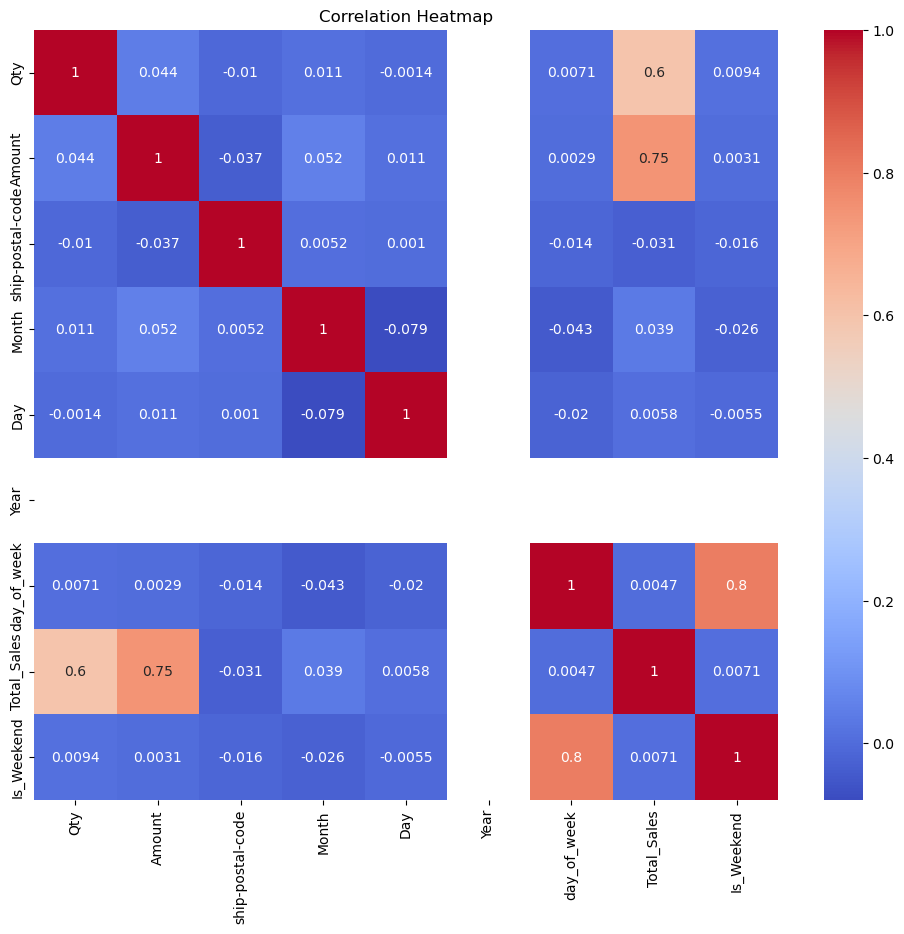

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


*Correlation coefficients range from -1 to 1:*
- A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to increase.
- A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
- A value close to 0 implies little to no correlation between the variables.